In [6]:
# import the libraries
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport

In [2]:
# read the dataset
df = pd.read_csv("./data/CEE_DATA.csv")

In [3]:
X = df[['Gender', 'Caste', 'coaching', 'time',
       'Class_ten_education', 'twelve_education', 'medium',
       'Class_ X_Percentage', 'Class_XII_Percentage', 'Father_occupation',
       'Mother_occupation']]
Y = df[['Performance']]

In [12]:
# Descriptive report on the dataset
profile = ProfileReport(df, title="Pandas Profiling Report")
profile.to_file("profiling_report.html")

Render HTML: 100%|██████████| 1/1 [00:00<00:00,  1.36it/s]


## Train a model with one-hot encoding

In [5]:
X = pd.get_dummies(X)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
print("Train Size Instances: ", X_train.shape[0])
print("Test Size Instances:", X_test.shape[0])
clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
print("Accuracy: ", metrics.accuracy_score(Y_test, Y_pred))

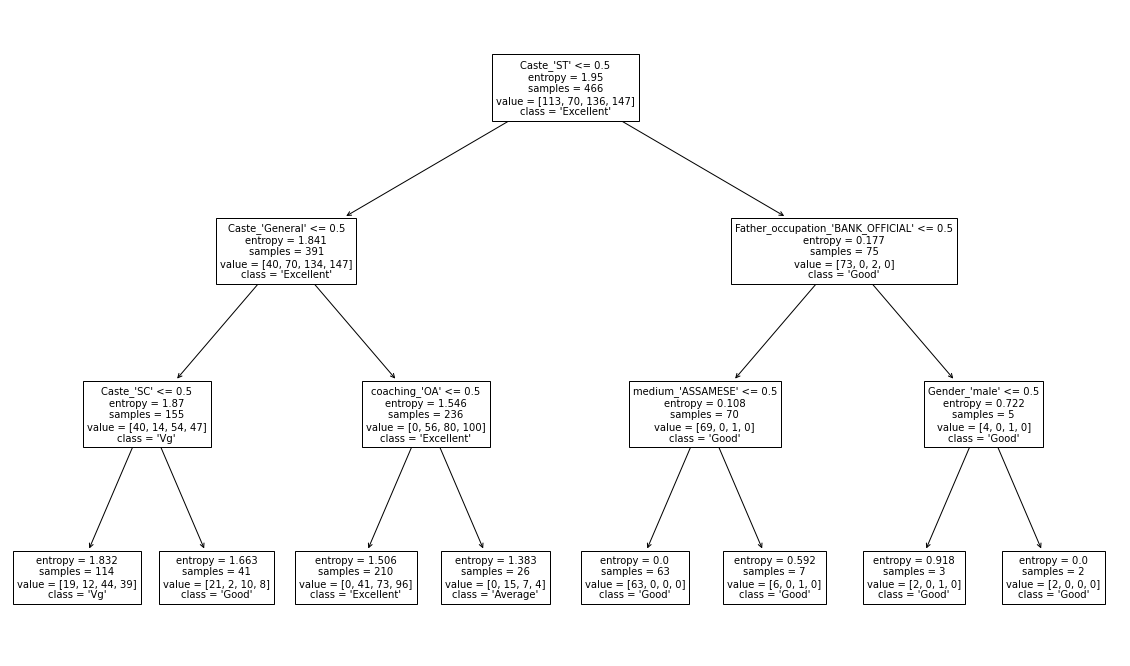

In [11]:
plt.figure(figsize=(20,12))
tree.plot_tree(clf, fontsize=10, feature_names=list(X.columns), class_names=list(set(Y.values.reshape(-1,))))
plt.show()